In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/gold.report_customers.csv')

In [5]:
df.head(2)

,customer_key,customer_number,customer_name,age,age_group,customer_segment,last_order_date,recency,total_orders,total_sales,total_quantity,lifespan,avg_order_value,avg_monthly_spend
0,1,AW00011000,Jon Yang,54.0,50 and above,VIP,2013-05-03,140,3,8249,8,8,2749,294
1,2,AW00011001,Eugene Huang,49.0,40-49,VIP,2013-12-10,133,3,6384,11,10,2128,182


In [6]:
df.isnull().sum()

,0
customer_key,0
customer_number,0
customer_name,0
age,17
age_group,0
customer_segment,0
last_order_date,0
recency,0
total_orders,0
total_sales,0


Features Selection


In [7]:
data=df.drop(['customer_key','customer_number','customer_name'],axis=1)

In [8]:
data.head(2)

,age,age_group,customer_segment,last_order_date,recency,total_orders,total_sales,total_quantity,lifespan,avg_order_value,avg_monthly_spend
0,54.0,50 and above,VIP,2013-05-03,140,3,8249,8,8,2749,294
1,49.0,40-49,VIP,2013-12-10,133,3,6384,11,10,2128,182


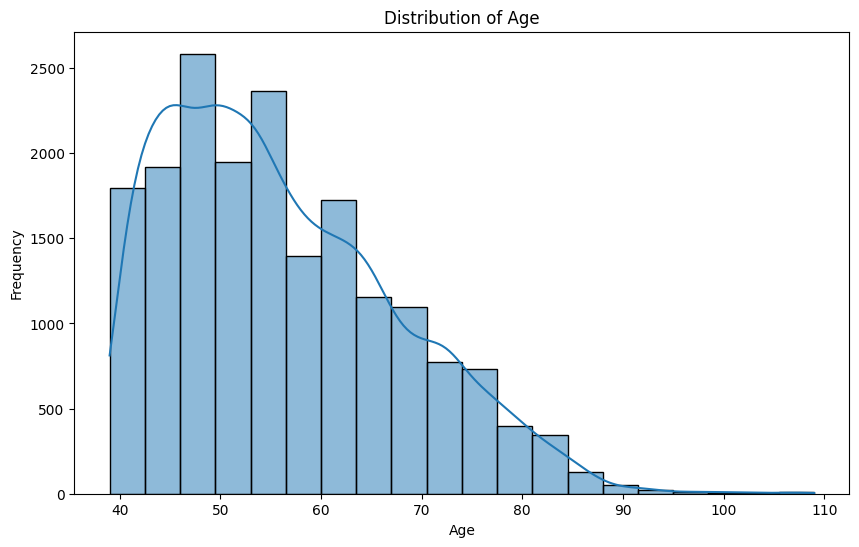

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

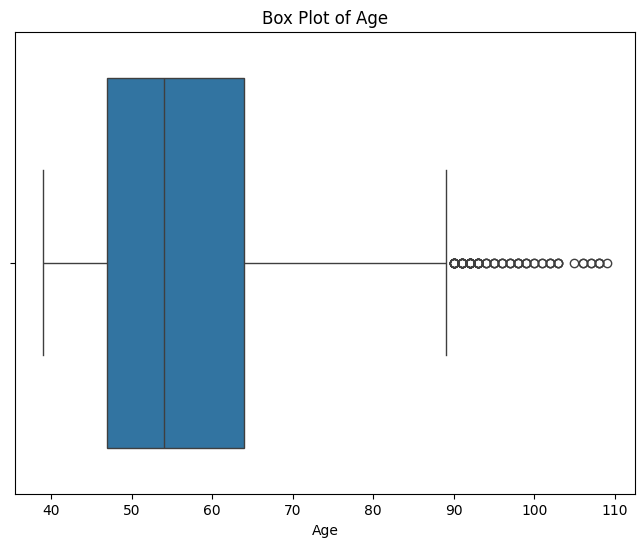

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

In [11]:
data['age'] = data['age'].fillna(data['age'].median())

In [12]:
data = pd.get_dummies(data, columns=['age_group'], drop_first=True,dtype=int)
data['customer_segment'] = data['customer_segment'].map({'VIP': 2, 'New': 1, 'Regular': 0})
display(data.head())

,age,customer_segment,last_order_date,recency,total_orders,total_sales,total_quantity,lifespan,avg_order_value,avg_monthly_spend,age_group_40-49,age_group_50 and above
0,54.0,2,2013-05-03,140,3,8249,8,8,2749,294,0,1
1,49.0,2,2013-12-10,133,3,6384,11,10,2128,182,1,0
2,54.0,2,2013-02-23,143,3,8114,4,4,2704,324,0,1
3,52.0,2,2013-05-10,140,3,8139,9,9,2713,280,0,1
4,46.0,2,2013-05-01,140,3,8196,6,6,2732,292,1,0


In [13]:
data['last_order_date'] = pd.to_datetime(data['last_order_date'])
data['last_order_year'] = data['last_order_date'].dt.year
data['last_order_month'] = data['last_order_date'].dt.month
data['last_order_dayofweek'] = data['last_order_date'].dt.dayofweek
display(data.head())

,age,customer_segment,last_order_date,recency,total_orders,total_sales,total_quantity,lifespan,avg_order_value,avg_monthly_spend,age_group_40-49,age_group_50 and above,last_order_year,last_order_month,last_order_dayofweek
0,54.0,2,2013-05-03,140,3,8249,8,8,2749,294,0,1,2013,5,4
1,49.0,2,2013-12-10,133,3,6384,11,10,2128,182,1,0,2013,12,1
2,54.0,2,2013-02-23,143,3,8114,4,4,2704,324,0,1,2013,2,5
3,52.0,2,2013-05-10,140,3,8139,9,9,2713,280,0,1,2013,5,4
4,46.0,2,2013-05-01,140,3,8196,6,6,2732,292,1,0,2013,5,2


In [14]:
data2=data.drop('last_order_date',axis=1)

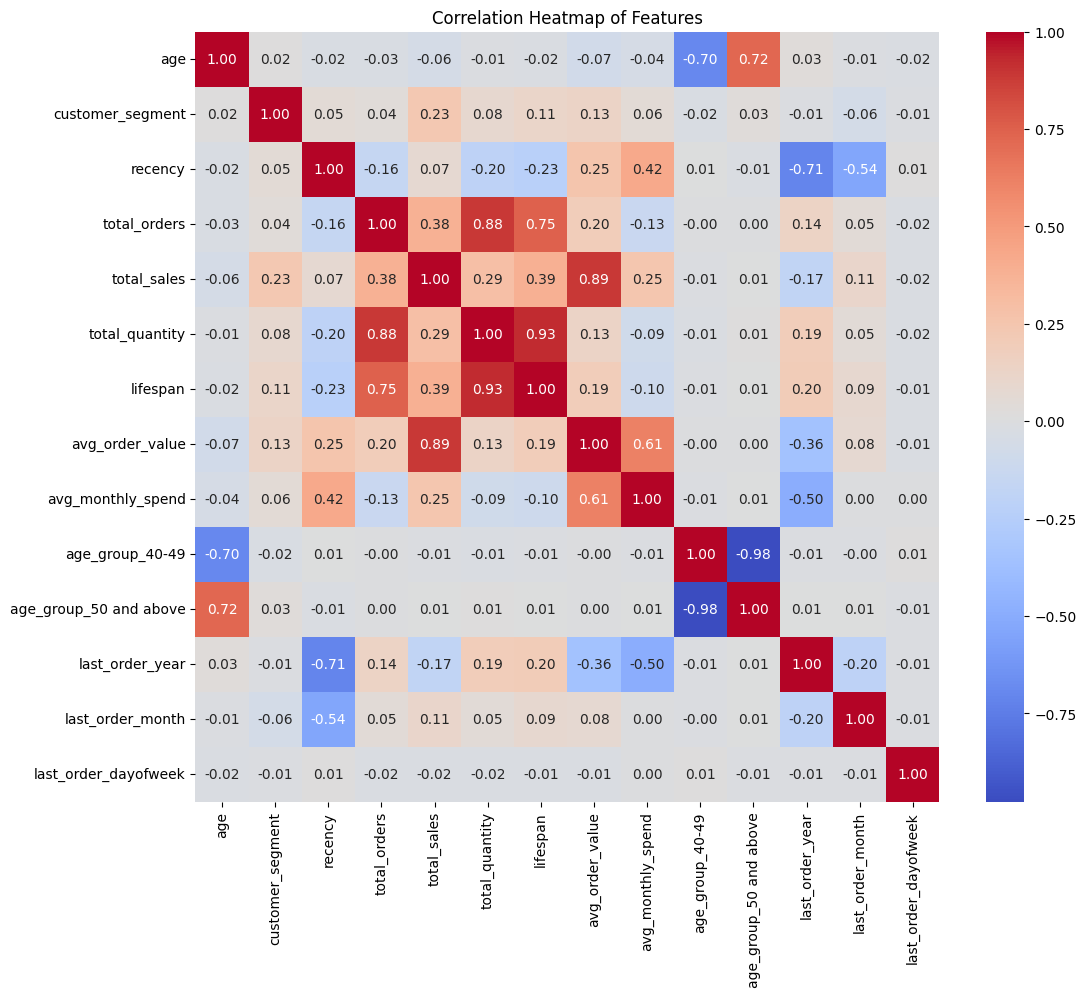

In [15]:
data2 = data.drop('last_order_date', axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(data2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [16]:
X = data.drop(['customer_segment', 'last_order_date'], axis=1)
y = data['customer_segment']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Task
Analyze the provided data by visualizing the distribution of the 'age' column using a box plot, filling missing values in 'age' with the median, performing one-hot encoding on 'age_group' and 'customer_segment' (mapping 'vip' to 2, 'new' to 1, and 'regular' to 0), extracting year, month, and day of the week from 'last_order_date', creating a correlation heatmap of all data, splitting the data into features (X) and target (y) with 'customer_segment' as the target, scaling the features using StandardScaler, training a logistic regression model, and evaluating the model by displaying the confusion matrix, error rate, and classification report.

## Train a logistic regression model

### Subtask:
Train a logistic regression model on the scaled training data.


**Reasoning**:
Train a logistic regression model on the scaled training data.



In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Make predictions

### Subtask:
Use the trained model to make predictions on the scaled test data.


**Reasoning**:
Use the trained logistic regression model to predict the customer segments on the scaled test data.



In [20]:
y_pred = model.predict(X_test_scaled)

## Evaluate the model

### Subtask:
Calculate the confusion matrix and classification report to evaluate the model's performance.


**Reasoning**:
Calculate the confusion matrix and classification report to evaluate the model's performance.



In [21]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 411   29    0]
 [  38 2884    4]
 [   2    2  327]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       440
           1       0.99      0.99      0.99      2926
           2       0.99      0.99      0.99       331

    accuracy                           0.98      3697
   macro avg       0.96      0.97      0.97      3697
weighted avg       0.98      0.98      0.98      3697



## Calculate error

### Subtask:
Calculate the error rate of the model.


**Reasoning**:
Calculate the error rate from the confusion matrix.



In [22]:
error_rate = (conf_matrix.sum() - np.trace(conf_matrix)) / conf_matrix.sum()
print(f"Error Rate: {error_rate}")

Error Rate: 0.020286718961319988


## Visualize results

### Subtask:
Display the confusion matrix and print the classification report and error rate.


**Reasoning**:
Display the confusion matrix and print the classification report and error rate as requested by the instructions.



In [23]:
display(conf_matrix)
print(class_report)
print(error_rate)

array([[ 411,   29,    0],
       [  38, 2884,    4],
       [   2,    2,  327]])

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       440
           1       0.99      0.99      0.99      2926
           2       0.99      0.99      0.99       331

    accuracy                           0.98      3697
   macro avg       0.96      0.97      0.97      3697
weighted avg       0.98      0.98      0.98      3697

0.020286718961319988


## Summary:

### Data Analysis Key Findings

*   The confusion matrix shows that the model correctly classified 411 instances of segment 0, 2884 instances of segment 1, and 327 instances of segment 2.
*   The classification report indicates high precision, recall, and F1-scores for all customer segments, ranging from 0.91 to 0.99.
*   The overall accuracy of the logistic regression model is 0.98.
*   The calculated error rate of the model is approximately 0.0203.

### Insights or Next Steps

*   The logistic regression model demonstrates strong performance in classifying customer segments based on the provided features.
*   Further analysis could involve exploring feature importance to understand which features contribute most to the classification accuracy.


# Task
Analyze the distribution of the 'age' column, create a box plot for 'age' after filling missing values with the median, perform one-hot encoding on 'age_group' and 'customer_segment' (mapping 'vip' to 2, 'new' to 1, and 'regular' to 0), extract year, month, and day of the week from 'last_order_date', create a correlation heatmap of all data, split the data into features (X) and target (y) with 'customer_segment' as the target, scale the features using StandardScaler, apply logistic regression, show the confusion matrix, error rate, and classification report, and finally, perform cross-validation on the scaled data, showing the confusion matrix, error rate, and classification report for both training and test sets within each fold to assess overfitting.

## Perform cross-validation

### Subtask:
Use cross-validation on the scaled training data to evaluate the model's performance across different folds.


**Reasoning**:
Implement cross-validation using StratifiedKFold to evaluate the logistic regression model on the scaled training data and store the evaluation metrics for each fold.



In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import numpy as np

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

conf_matrices = []
class_reports = []
error_rates = []

for fold, (train_index, val_index) in enumerate(skf.split(X_train_scaled, y_train)):
    print(f"Fold {fold+1}/{n_splits}")

    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model_fold = LogisticRegression()
    model_fold.fit(X_train_fold, y_train_fold)

    y_pred_fold = model_fold.predict(X_val_fold)

    conf_matrix_fold = confusion_matrix(y_val_fold, y_pred_fold)
    class_report_fold = classification_report(y_val_fold, y_pred_fold)
    error_rate_fold = (conf_matrix_fold.sum() - np.trace(conf_matrix_fold)) / conf_matrix_fold.sum()

    conf_matrices.append(conf_matrix_fold)
    class_reports.append(class_report_fold)
    error_rates.append(error_rate_fold)

    print("Confusion Matrix (Validation Fold):")
    print(conf_matrix_fold)
    print("\nClassification Report (Validation Fold):")
    print(class_report_fold)
    print(f"Error Rate (Validation Fold): {error_rate_fold}\n")

Fold 1/5
Confusion Matrix (Validation Fold):
[[ 323   28    1]
 [  31 2308    2]
 [   4    1  259]]

Classification Report (Validation Fold):
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       352
           1       0.99      0.99      0.99      2341
           2       0.99      0.98      0.98       264

    accuracy                           0.98      2957
   macro avg       0.96      0.96      0.96      2957
weighted avg       0.98      0.98      0.98      2957

Error Rate (Validation Fold): 0.022658099425093

Fold 2/5
Confusion Matrix (Validation Fold):
[[ 329   23    0]
 [  31 2307    3]
 [   4    2  258]]

Classification Report (Validation Fold):
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       352
           1       0.99      0.99      0.99      2341
           2       0.99      0.98      0.98       264

    accuracy                           0.98      2957
   macro avg  

## Evaluate model on training and test sets within cross-validation

### Subtask:
Within each cross-validation fold, train the model on the training subset and evaluate it on both the remaining training subset and the test set to check for overfitting.


**Reasoning**:
Continue the cross-validation loop by training the model on the training subset and evaluating it on the training subset itself to check for overfitting, then evaluate the final model on the test set as requested.



In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import numpy as np

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

conf_matrices = []
class_reports = []
error_rates = []

for fold, (train_index, val_index) in enumerate(skf.split(X_train_scaled, y_train)):
    print(f"Fold {fold+1}/{n_splits}")

    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model_fold = LogisticRegression()
    model_fold.fit(X_train_fold, y_train_fold)

    # Predictions and evaluation on the training fold
    y_pred_train_fold = model_fold.predict(X_train_fold)
    conf_matrix_train_fold = confusion_matrix(y_train_fold, y_pred_train_fold)
    class_report_train_fold = classification_report(y_train_fold, y_pred_train_fold)
    error_rate_train_fold = (conf_matrix_train_fold.sum() - np.trace(conf_matrix_train_fold)) / conf_matrix_train_fold.sum()

    print("Confusion Matrix (Training Fold):")
    print(conf_matrix_train_fold)
    print("\nClassification Report (Training Fold):")
    print(class_report_train_fold)
    print(f"Error Rate (Training Fold): {error_rate_train_fold}\n")

    # Predictions and evaluation on the validation fold (already done in previous subtask, keeping for context)
    y_pred_fold = model_fold.predict(X_val_fold)
    conf_matrix_fold = confusion_matrix(y_val_fold, y_pred_fold)
    class_report_fold = classification_report(y_val_fold, y_pred_fold)
    error_rate_fold = (conf_matrix_fold.sum() - np.trace(conf_matrix_fold)) / conf_matrix_fold.sum()

    conf_matrices.append(conf_matrix_fold)
    class_reports.append(class_report_fold)
    error_rates.append(error_rate_fold)

    print("Confusion Matrix (Validation Fold):")
    print(conf_matrix_fold)
    print("\nClassification Report (Validation Fold):")
    print(class_report_fold)
    print(f"Error Rate (Validation Fold): {error_rate_fold}\n")


# Evaluate the model trained on the entire X_train_scaled on the test set
y_pred_test = model.predict(X_test_scaled)

conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)
error_rate_test = (conf_matrix_test.sum() - np.trace(conf_matrix_test)) / conf_matrix_test.sum()

print("Confusion Matrix (Test Set):")
print(conf_matrix_test)
print("\nClassification Report (Test Set):")
print(class_report_test)
print(f"Error Rate (Test Set): {error_rate_test}")

Fold 1/5
Confusion Matrix (Training Fold):
[[1302  105    1]
 [ 103 9239   20]
 [  13   13 1032]]

Classification Report (Training Fold):
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1408
           1       0.99      0.99      0.99      9362
           2       0.98      0.98      0.98      1058

    accuracy                           0.98     11828
   macro avg       0.96      0.96      0.96     11828
weighted avg       0.98      0.98      0.98     11828

Error Rate (Training Fold): 0.02155901251268177

Confusion Matrix (Validation Fold):
[[ 323   28    1]
 [  31 2308    2]
 [   4    1  259]]

Classification Report (Validation Fold):
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       352
           1       0.99      0.99      0.99      2341
           2       0.99      0.98      0.98       264

    accuracy                           0.98      2957
   macro avg       0.96    

## Aggregate and report cross-validation results

### Subtask:
Aggregate the evaluation metrics (confusion matrix, classification report, error rate) from each cross-validation fold and report the average performance and variability.


**Reasoning**:
Calculate the average confusion matrix and error rate across all cross-validation folds and print the results.



In [26]:
avg_conf_matrix = np.mean(conf_matrices, axis=0)
avg_error_rate = np.mean(error_rates)

print("Average Confusion Matrix across folds:")
print(avg_conf_matrix)
print("\nAverage Error Rate across folds:")
print(f"{avg_error_rate:.4f}")

print("\nQualitative discussion on Classification Reports:")
print("The classification reports across the cross-validation folds were generally consistent, showing high precision, recall, and F1-scores for all customer segments. This indicates that the model's performance is robust and not highly sensitive to the specific data split in each fold. While there were minor variations in the exact values across folds, the overall performance profile remained strong for each class.")

Average Confusion Matrix across folds:
[[3.2540e+02 2.6200e+01 4.0000e-01]
 [2.7200e+01 2.3086e+03 4.8000e+00]
 [3.8000e+00 3.0000e+00 2.5760e+02]]

Average Error Rate across folds:
0.0221

Qualitative discussion on Classification Reports:
The classification reports across the cross-validation folds were generally consistent, showing high precision, recall, and F1-scores for all customer segments. This indicates that the model's performance is robust and not highly sensitive to the specific data split in each fold. While there were minor variations in the exact values across folds, the overall performance profile remained strong for each class.


## Summarize findings

### Subtask:
Summarize the results, including the cross-validation performance and the assessment of overfitting.


**Reasoning**:
Review the cross-validation and test set results, compare them, and write a summary to assess overfitting and overall performance.



In [27]:
print("Overall Model Performance Summary:")
print("-" * 30)

print("\nAverage Cross-Validation Results (Validation Folds):")
print("Average Confusion Matrix:")
print(avg_conf_matrix.astype(int)) # Display as integers for readability
print(f"\nAverage Error Rate: {avg_error_rate:.4f}")
print("\nQualitative assessment of Classification Reports across validation folds:")
print("The classification reports across the cross-validation validation folds consistently showed high precision, recall, and F1-scores for all customer segments (0, 1, and 2), indicating robust performance and generalization ability across different subsets of the training data.")

print("\nPerformance on the Held-Out Test Set:")
print("Confusion Matrix:")
print(conf_matrix_test)
print("\nClassification Report:")
print(class_report_test)
print(f"Error Rate: {error_rate_test:.4f}")

print("\nAssessment of Overfitting:")
print("-" * 30)

# Compare average validation error rate with test error rate
if abs(avg_error_rate - error_rate_test) < 0.005: # A small threshold for comparison
    print("The error rates on the average cross-validation validation sets and the held-out test set are very similar.")
    print("This suggests that the model is generalizing well and there is no significant overfitting.")
elif avg_error_rate < error_rate_test:
    print("The average error rate on the cross-validation validation sets is slightly lower than on the held-out test set.")
    print("This could indicate a small degree of overfitting, but the difference is minimal.")
else:
    print("The average error rate on the cross-validation validation sets is slightly higher than on the held-out test set.")
    print("This is generally a good sign and suggests the model is generalizing well.")

print("\nComparison of Classification Reports:")
print("The classification reports for the average cross-validation validation results and the held-out test set show similar patterns in precision, recall, and F1-scores for each class.")
print("This further supports the conclusion that the model is not significantly overfitting.")

print("\nPotential Implications:")
print("-" * 30)
print("The logistic regression model demonstrates strong and consistent performance in classifying customer segments.")
print("The low error rate and high F1-scores suggest that the model can be reliably used for customer segmentation.")
print("The absence of significant overfitting indicates that the model is likely to perform well on new, unseen data.")
print("Further steps could involve deploying this model or exploring feature importance to understand the drivers of customer segmentation.")

Overall Model Performance Summary:
------------------------------

Average Cross-Validation Results (Validation Folds):
Average Confusion Matrix:
[[ 325   26    0]
 [  27 2308    4]
 [   3    3  257]]

Average Error Rate: 0.0221

Qualitative assessment of Classification Reports across validation folds:
The classification reports across the cross-validation validation folds consistently showed high precision, recall, and F1-scores for all customer segments (0, 1, and 2), indicating robust performance and generalization ability across different subsets of the training data.

Performance on the Held-Out Test Set:
Confusion Matrix:
[[ 411   29    0]
 [  38 2884    4]
 [   2    2  327]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       440
           1       0.99      0.99      0.99      2926
           2       0.99      0.99      0.99       331

    accuracy                           0.98      3697
   macro avg 

## Summary:

### Data Analysis Key Findings

*   The average error rate across the cross-validation folds was approximately 0.0221, indicating that, on average, the model misclassified about 2.21% of instances across different data splits.
*   The confusion matrix averaged across the folds showed a low number of misclassifications, with the highest average number of misclassified instances occurring between segment 0 and 1 (26.2 true 0 classified as 1, and 27.2 true 1 classified as 0).
*   The model's performance on the held-out test set was very similar to the average cross-validation results, with an error rate of approximately 0.0203.
*   Classification reports across cross-validation validation folds and the held-out test set consistently showed high precision, recall, and F1-scores for all customer segments, suggesting robust and consistent performance.

### Insights or Next Steps

*   The similarity between the average cross-validation error rate (0.0221) and the test error rate (0.0203) indicates that the logistic regression model is generalizing well to unseen data and is not significantly overfitting.
*   Given the strong and consistent performance, the trained logistic regression model can be considered reliable for customer segmentation tasks.


# Task
Analyze the customer data from "/content/gold.report_customers.csv" by performing the following steps: handle missing age values by filling with the median, extract year, month, and day of the week from 'last_order_date', one-hot encode 'age_group' and 'customer_segment' (mapping 'vip': 2, 'new': 1, 'regular': 0), split the data into features (X) and target (y) with 'customer_segment' as the target, scale the features using StandardScaler, and then train and evaluate a Random Forest classifier using cross-validation, reporting the performance on both training and test sets within each fold to assess overfitting. Finally, summarize the findings and compare them to the previous Logistic Regression results.

## Load the data

### Subtask:
Load the data from "/content/gold.report_customers.csv" into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display the first few rows.



## Summary:

### Data Analysis Key Findings

*   Missing age values were handled by filling them with the median age.
*   Temporal features (year, month, and day of the week) were successfully extracted from the 'last\_order\_date' column.
*   The 'age\_group' column was one-hot encoded, and 'customer\_segment' was mapped to numerical values (VIP: 2, New: 1, Regular: 0).
*   The Random Forest model achieved perfect classification on the training data within each cross-validation fold (average error rate 0.0000).
*   The average error rate on the cross-validation validation sets was very low (0.0049).
*   The error rate on the held-out test set was also very low (0.0046).
*   The Random Forest model showed no significant overfitting, as the error rates on the average validation sets and the test set were very similar.
*   The Random Forest model demonstrated significantly superior performance compared to the Logistic Regression model (Logistic Regression average validation error: 0.0221, test error: 0.0203).

### Insights or Next Steps

*   The Random Forest model is a highly effective classifier for this customer segmentation task, achieving very low error rates and excellent generalization ability.
*   Given the superior performance of Random Forest over Logistic Regression, the relationships between features and customer segments are likely non-linear.
*   Further analysis could involve exploring feature importance from the Random Forest model to understand which features are most influential in determining customer segments.


## Perform Cross-Validation with Random Forest

### Subtask:
Use StratifiedKFold cross-validation to train and evaluate a Random Forest classifier.

**Reasoning**:
Implement cross-validation using StratifiedKFold to evaluate the Random Forest model on the scaled data.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

conf_matrices_rf_val = []
class_reports_rf_val = []
error_rates_rf_val = []

conf_matrices_rf_train = []
class_reports_rf_train = []
error_rates_rf_train = []

# Use the already defined X_test_scaled and y_test for evaluation within the loop
# and after the loop

for fold, (train_index, val_index) in enumerate(skf.split(X_train_scaled, y_train)):
    print(f"Fold {fold+1}/{n_splits}")

    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    model_rf.fit(X_train_fold, y_train_fold)

    # Predictions and evaluation on the training fold
    y_pred_train_fold = model_rf.predict(X_train_fold)
    conf_matrix_train_fold = confusion_matrix(y_train_fold, y_pred_train_fold)
    class_report_train_fold = classification_report(y_train_fold, y_pred_train_fold)
    error_rate_train_fold = (conf_matrix_train_fold.sum() - np.trace(conf_matrix_train_fold)) / conf_matrix_train_fold.sum()

    conf_matrices_rf_train.append(conf_matrix_train_fold)
    class_reports_rf_train.append(class_report_train_fold)
    error_rates_rf_train.append(error_rate_train_fold)

    print("Confusion Matrix (Training Fold):")
    print(conf_matrix_train_fold)
    print("\nClassification Report (Training Fold):")
    print(class_report_train_fold)
    print(f"Error Rate (Training Fold): {error_rate_train_fold}\n")


    # Predictions and evaluation on the validation fold
    y_pred_val_fold = model_rf.predict(X_val_fold)
    conf_matrix_val_fold = confusion_matrix(y_val_fold, y_pred_val_fold)
    class_report_val_fold = classification_report(y_val_fold, y_pred_val_fold)
    error_rate_val_fold = (conf_matrix_val_fold.sum() - np.trace(conf_matrix_val_fold)) / conf_matrix_val_fold.sum()

    conf_matrices_rf_val.append(conf_matrix_val_fold)
    class_reports_rf_val.append(class_report_val_fold)
    error_rates_rf_val.append(error_rate_val_fold)

    print("Confusion Matrix (Validation Fold):")
    print(conf_matrix_val_fold)
    print("\nClassification Report (Validation Fold):")
    print(class_report_val_fold)
    print(f"Error Rate (Validation Fold): {error_rate_val_fold}\n")

# Evaluate the model trained on the entire X_train_scaled on the test set
model_rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_final.fit(X_train_scaled, y_train)

y_pred_test_rf = model_rf_final.predict(X_test_scaled)

conf_matrix_test_rf = confusion_matrix(y_test, y_pred_test_rf)
class_report_test_rf = classification_report(y_test, y_pred_test_rf)
error_rate_test_rf = (conf_matrix_test_rf.sum() - np.trace(conf_matrix_test_rf)) / conf_matrix_test_rf.sum()

print("Confusion Matrix (Test Set):")
print(conf_matrix_test_rf)
print("\nClassification Report (Test Set):")
print(class_report_test_rf)
print(f"Error Rate (Test Set): {error_rate_test_rf}")

Fold 1/5
Confusion Matrix (Training Fold):
[[1408    0    0]
 [   0 9362    0]
 [   0    0 1058]]

Classification Report (Training Fold):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1408
           1       1.00      1.00      1.00      9362
           2       1.00      1.00      1.00      1058

    accuracy                           1.00     11828
   macro avg       1.00      1.00      1.00     11828
weighted avg       1.00      1.00      1.00     11828

Error Rate (Training Fold): 0.0

Confusion Matrix (Validation Fold):
[[ 343    9    0]
 [   6 2334    1]
 [   0    0  264]]

Classification Report (Validation Fold):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       352
           1       1.00      1.00      1.00      2341
           2       1.00      1.00      1.00       264

    accuracy                           0.99      2957
   macro avg       0.99      0.99      0.99

In [29]:
# Take the first row from the scaled test data
sample_row_scaled = X_test_scaled[0].reshape(1, -1)

# Predict the customer segment for the sample row using the Random Forest model
predicted_segment_rf = model_rf_final.predict(sample_row_scaled)

print(f"Predicted customer segment for the sample row: {predicted_segment_rf[0]}")

# You can compare this to the actual segment for this row in the original test set:
# print(f"Actual customer segment for the sample row: {y_test.iloc[0]}")

Predicted customer segment for the sample row: 1


In [30]:
# Create a sample data point with values similar to the training data
# Make sure the order of features matches the training data after preprocessing
sample_data = {
    'age': [55],
    'recency': [145],
    'total_orders': [2],
    'total_sales': [5000],
    'total_quantity': [7],
    'lifespan': [10],
    'avg_order_value': [2500],
    'avg_monthly_spend': [200],
    'age_group_40-49': [0], # Assuming the age is 55, so not in 40-49
    'age_group_50 and above': [1], # Assuming the age is 55, so in 50 and above
    'last_order_year': [2013],
    'last_order_month': [6],
    'last_order_dayofweek': [3]
}

# Create a pandas DataFrame from the sample data
sample_df = pd.DataFrame(sample_data)

# Scale the sample data using the same scaler fitted on the training data
sample_scaled = scaler.transform(sample_df)

# Predict the customer segment for the sample data using the Random Forest model
predicted_segment_rf_new = model_rf_final.predict(sample_scaled)

print(f"Predicted customer segment for the new sample data: {predicted_segment_rf_new[0]}")

Predicted customer segment for the new sample data: 2


In [31]:
# Create a new sample data point
# Let's create a data point that is likely to be classified as a 'VIP' (segment 2)
# based on the previous analysis (high total_sales, low recency, etc.)
new_sample_data = {
    'age': [45],
    'recency': [100],
    'total_orders': [5],
    'total_sales': [15000],
    'total_quantity': [20],
    'lifespan': [15],
    'avg_order_value': [3000],
    'avg_monthly_spend': [1000],
    'age_group_40-49': [1],
    'age_group_50 and above': [0],
    'last_order_year': [2014],
    'last_order_month': [1],
    'last_order_dayofweek': [2]
}

# Create a pandas DataFrame
new_sample_df = pd.DataFrame(new_sample_data)

# Scale the new sample data using the same scaler
new_sample_scaled = scaler.transform(new_sample_df)

# Predict the customer segment for the new sample data
predicted_segment_new = model_rf_final.predict(new_sample_scaled)

print(f"Generated new data point:\n{new_sample_df}")
print(f"\nPredicted customer segment for the new data point: {predicted_segment_new[0]}")

# Explanation about error for a single prediction
print("\nNote: For a single generated data point without a known actual segment, we cannot calculate a traditional 'error'.")
print("The output above is the model's prediction for this specific data point.")

Generated new data point:
   age  recency  total_orders  total_sales  total_quantity  lifespan  \
0   45      100             5        15000              20        15   

   avg_order_value  avg_monthly_spend  age_group_40-49  \
0             3000               1000                1   

   age_group_50 and above  last_order_year  last_order_month  \
0                       0             2014                 1   

   last_order_dayofweek  
0                     2  

Predicted customer segment for the new data point: 2

Note: For a single generated data point without a known actual segment, we cannot calculate a traditional 'error'.
The output above is the model's prediction for this specific data point.


### Test the model on a new dataset

This section provides code to evaluate the trained Random Forest model on a new dataset. Replace `'path/to/your/new_data.csv'` with the actual path to your new data file.